<a href="https://colab.research.google.com/github/mebirtukan/EyeMovementEventDetectionAlgorithms/blob/main/I_VT_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import  TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, cohen_kappa_score



In [ ]:
!wget www.kasprowski.pl/datasets/events.zip
!unzip -o events.zip > xx

In [3]:
def openfile(filename):
  mat = loadmat(filename)
  mdata = mat['ETdata']
  mtype = mdata.dtype
  ndata = {n: mdata[n][0,0] for n in mtype.names}
  data_headline = ndata['pos']
  data_headline = data_headline[0]
  data_raw = ndata['pos']
  pdata = pd.DataFrame(data_raw,columns=data_headline)
  df=pd.DataFrame(pdata)
  df[1.0]=df[1.0].astype(int)
  #t=pdata.iloc[:, 0].values maybe we shoud use it...
  x=pdata.iloc[:, 3:5].values
  y=pdata.iloc[:, 5].values
  print("File",filename,"opened")
  return x ,y

In [4]:
## we don't use it here for now
def open_list_of_files(files_to_load):
  samples = []
  labels =[]
  for my_file in files_to_load:
    sam,lab = openfile(my_file)
    #ssam,slab = make_sequences(sam,lab,50)
    print('Number of samples so far:',len(samples))
    samples.extend(sam)
    labels.extend(lab)
  samples = np.array(samples)
  labels = np.array(labels)
  print('Number of samples at the end:',len(samples))
  return samples,labels
files_to_load = ['data/UH33_img_vy_labelled_MN.mat','data/UH47_img_Europe_labelled_RA.mat','data/UH21_img_Rome_labelled_MN.mat']
#files_to_load = ['data/TH34_img_Europe_labelled_MN.mat', 'data/UH21_img_Rome_labelled_RA.mat', 'data/UH47_img_Europe_labelled_MN.mat', 'data/UH27_img_vy_labelled_MN.mat']

#s,l = open_list_of_files(files_to_load)
x,y=open_list_of_files(files_to_load)
print(x.shape)
print(y.shape)
#print(s1.shape)
#print(l1.shape)

File data/UH33_img_vy_labelled_MN.mat opened
Number of samples so far: 0
File data/UH47_img_Europe_labelled_RA.mat opened
Number of samples so far: 4988
File data/UH21_img_Rome_labelled_MN.mat opened
Number of samples so far: 6985
Number of samples at the end: 11973
(11973, 2)
(11973,)


In [ ]:
#len(y1)

In [ ]:
#x,y=openfile('data/UH21_img_Rome_labelled_RA.mat')

#x,y=openfile('UH21_video_BergoDalbana_labelled_MN.mat')
#x,y=openfile('UH29_video_dolphin_fov_labelled_RA.mat')
#x,y=openfile('data/UH33_img_vy_labelled_MN.mat')
#x,y=openfile('data/UH29_video_dolphin_fov_labelled_RA.mat')

In [5]:
import math

In [ ]:
! pip install atan2

In [2]:
import csv
import numpy as np

# we assume that the frequency is 500Hz so there is 2ms gap between every two samples
def ivt(data,v_threshold,verbose=0):
  Xs = data[:,[0]]
  Ys = data[:,[1]]

  diffX = [] #x values difference
  diffY = [] #y values difference 

  for i in range(len(data) - 1):
    diffX.append(float(Xs[i+1]) - float(Xs[i]) )
    diffY.append(float(Ys[i+1]) - float(Ys[i]) )
  #distance = np.sqrt(np.power(diffX,2) + np.power(diffY,2))
  #velocity = np.divide(distance,2) # 2ms gap!
  #velocity = np.absolute(velocity)
  Velocity = []
  direction=[]
  for i in range(len(diffX)):
    Velocity.append(diffX[i] + diffY[i])
    #direction.append(atan2(diffX[i], diffY[i]))
    # ORIGINAL velocity=np.divide(Velocity, 2)
    # Now we assume 30HZ so there is a 30ms gap between every two samples
    # Ok so in order to calculate the real eye velocity, I need to figure out how much distance is between the angle measurements.
    # Or i can just keep it in radians / second
    # Standard difference between two measurements is X radians / 30 milliseconds 
    #velocity = np.multiply(Velocity, 0.030) # could also do np.divide(Velocity, 33.33)
    velocity = np.multiply(Velocity, 0.010) # FOR 10 HERTZ
    velocity=np.absolute(velocity)

  global mvmts 
  mvmts = []  
  #store 1 in mvmts[] if velocity is less than threshold else store 2
  for v in velocity:
    if(v<v_threshold):
        mvmts.append(1)
    else:
        mvmts.append(2)


  if verbose==1: ## to show charts
    print(('minimum_velocity=',min(velocity)))
    print(('maximum_velocity=',max(velocity)))
    plt.plot(velocity)
    plt.xlabel("Time [ms]")
    plt.ylabel("Velocity [px/ms]")
    plt.plot([0,len(velocity)],[v_threshold,v_threshold])
    #plt.plot([number * 10 for number in mvmts])
    plt.show()
    plt.ylim(0,5)
    plt.plot(velocity)
    #plt.plot([number for number in mvmts])
    plt.xlabel("Time [ms]")
    plt.ylabel("Velocity [px/ms]")
    plt.plot([0,len(velocity)],[v_threshold,v_threshold])
  return mvmts,velocity


Loaded #EyeGazes: (6568, 2)
6568


/var/folders/ng/7x4_9x713tg35bv9h7qq2w7m0000gn/T/ipykernel_1035/1295079207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  diffX.append(float(Xs[i+1]) - float(Xs[i]) )
/var/folders/ng/7x4_9x713tg35bv9h7qq2w7m0000gn/T/ipykernel_1035/1295079207.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  diffY.append(float(Ys[i+1]) - float(Ys[i]) )


('minimum_velocity=', 1.2889504432678223e-08)
('maximum_velocity=', 0.006056598871946335)


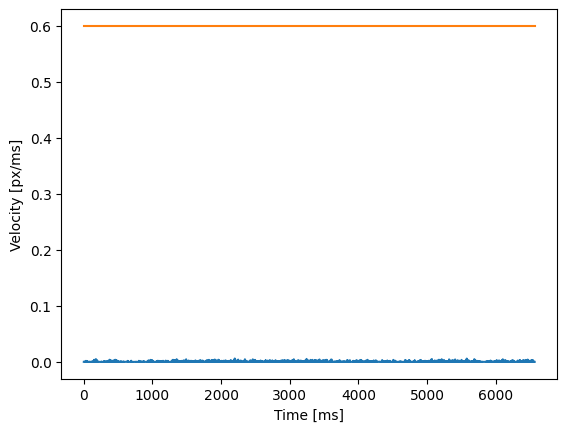

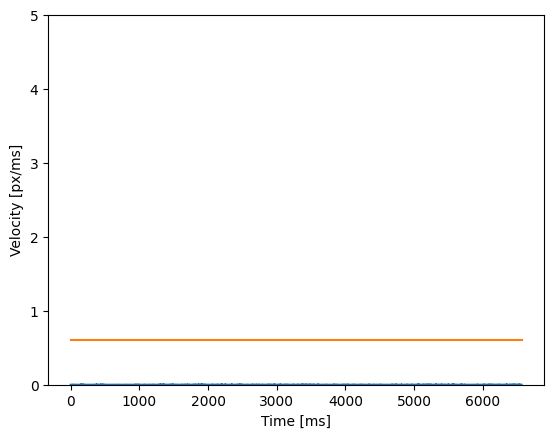

In [3]:
# Visualisation of v_threshold
#y1=ivt(x, v_threshold=0.6,verbose=1)


# Let's look at how our data compares to theirs
import projectaria_tools.core.mps as mps

gaze_path = "/Users/Ben/Downloads/mps_Jumana_vrs/eye_gaze/general_eye_gaze.csv"
gaze_cpf = mps.read_eyegaze(gaze_path)
pitches, yaws, times = zip(*[(obj.pitch, obj.yaw, obj.tracking_timestamp) for obj in gaze_cpf])
coords = list([obj.pitch, obj.yaw] for obj in gaze_cpf)
coords = np.array(coords)
# print(gaze_cpf)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# eye_move_dists = [0]
# for i in range(1, len(pitches)):
#     d_x = (pitches[i] - pitches[i-1])
#     d_y = (yaws[i] - yaws[i-1])
#     eye_move_dists.append(math.sqrt((d_x*d_x) + (d_y*d_y)))

# slope = pd.Series(np.gradient(pitches), times, name='slope')
# dists = pd.Series(eye_move_dists, times, name='dists')
# vals = pd.Series(pitches, times, name='pitches')
#slope = pd.Series([1,2,3], [1,2,3])
# print(x.shape)
# print("here2!")
print(coords.shape)

y2=ivt(coords, v_threshold=0.6,verbose=1)

In [ ]:
#y1=ivt(x, v_threshold=2)

In [ ]:
x.shape

In [ ]:
#y1=(y1[:-1])
y=(y[:-1])

#y2_1=(y2[:-1])
#y2=(y2[:-1])


In [8]:
thresholds=[x/10 for x in range(0,20)]

from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, precision_score, cohen_kappa_score, recall_score
fixation_recall=[]
fixation_precision=[]
fixation_f1_score=[]
saccade_recall=[]
saccade_precision=[]
saccade_f1_score=[]
cohen_kappa=[]


for t in thresholds:
  y1=ivt(x, v_threshold=t)[0]
  y_pred=np.array(y1)
  #print(len(y_real))
 # print(len(y_pred))
  cm=confusion_matrix(y, y_pred)

  #print(cm)
  print('classification_report for threshold', t, classification_report(y, y_pred))
  print('Kochen kappa for threshold', t, cohen_kappa_score(y, y_pred))
  print(classification_report(y,y_pred))
  #print(classification_report(y,y_pred['f1-score']))
  #Fixation accuracy calculation
  sumf=cm[0][0]+cm[0][1]
  Tc=cm[0][0]
  fixation_recall.append(Tc*100/sumf)
  print('Fixation recall at threshol',t, 'is', fixation_recall[-1])
  #fixation precision 
  sumfp=cm[0][0]+cm[1][0]
  Tcfp=cm[0][0]
  fixation_precision.append(Tcfp*100/sumfp)
  print('Fixation precission at threshold', t, 'is', fixation_precision[-1])
  #fixation f1_score
  multiple_recal_prec=2*((Tcfp*100/sumfp)*(Tc*100/sumf))
  add_recall_prec=((Tc*100/sumf)+Tcfp*100/sumfp)
  result_f1_score=multiple_recal_prec/add_recall_prec
  fixation_f1_score.append(result_f1_score)
  print('fixation_f1_score for threshold', t, 'is', fixation_f1_score[-1])
  #Saccade accuracy calculation
  sums=cm[1][0]+cm[1][1]
  Tcs=cm[1][1]
  saccade_recall.append(Tcs*100/sums)
  print('Saccade recall at threshol',t, 'is', saccade_recall[-1])
  #Saccade precison
  sum_saccP=cm[0][1]+cm[1][1]
  Tc_saccP=cm[1][1]
  saccade_precision.append(Tc_saccP*100/sum_saccP)
  print('saccade_precision for threshold', t, 'is', saccade_precision[-1])
  #saccade f1_score
  multiply=2*((Tc_saccP*100/sum_saccP)*(Tcs*100/sums))
  addition=(Tcs*100/sums)+(Tc_saccP*100/sum_saccP)
  saccade_f1_score.append(multiply/addition)
  print('saccade_f1_score for threshold', t, 'is', saccade_f1_score[-1])
  print('treshold=', t)
  
  

/var/folders/ng/7x4_9x713tg35bv9h7qq2w7m0000gn/T/ipykernel_1129/1295079207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  diffX.append(float(Xs[i+1]) - float(Xs[i]) )
/var/folders/ng/7x4_9x713tg35bv9h7qq2w7m0000gn/T/ipykernel_1129/1295079207.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  diffY.append(float(Ys[i+1]) - float(Ys[i]) )


ValueError: Found input variables with inconsistent numbers of samples: [11973, 11972]

/var/folders/ng/7x4_9x713tg35bv9h7qq2w7m0000gn/T/ipykernel_1129/1295079207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  diffX.append(float(Xs[i+1]) - float(Xs[i]) )
/var/folders/ng/7x4_9x713tg35bv9h7qq2w7m0000gn/T/ipykernel_1129/1295079207.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  diffY.append(float(Ys[i+1]) - float(Ys[i]) )


('minimum_velocity=', 1.2889504432678223e-08)
('maximum_velocity=', 0.006056598871946335)


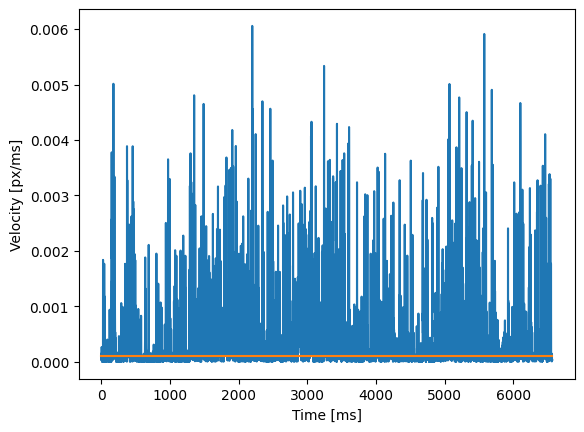

([2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,

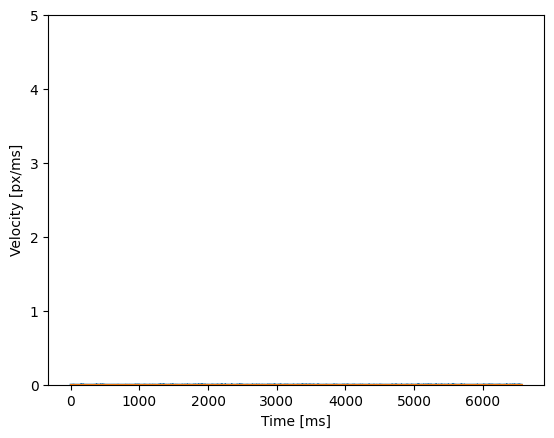

In [9]:
thresholds=[x/10 for x in range(0,20)]

from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, precision_score, cohen_kappa_score, recall_score
fixation_recall=[]
fixation_precision=[]
fixation_f1_score=[]
saccade_recall=[]
saccade_precision=[]
saccade_f1_score=[]
cohen_kappa=[]

y2=ivt(coords, v_threshold=0.0001, verbose=True)
print(y2)

# for t in thresholds:
#   y1=ivt(x, v_threshold=t)[0]
#   y_pred=np.array(y1)
#   #print(len(y_real))
#  # print(len(y_pred))
#   cm=confusion_matrix(y, y_pred)

  # y2=ivt(coords, v_threshold=1, verbose=True)
  # print(y2)
  # y2_1=coords
  # y2_pred=np.array(y2)
  # #print(len(y_real))
  # print(len(y2_1))
  # print(len(y2_pred))
  # cm=confusion_matrix(y2_1, y2_pred)
  # #print(cm)
  # print('classification_report for threshold', t, classification_report(y2_1, y2_pred))
  # print('Kochen kappa for threshold', t, cohen_kappa_score(y2_1, y2_pred))
  # print(classification_report(y2_1,y2_pred))
  # #print(classification_report(y,y_pred['f1-score']))
  # #Fixation accuracy calculation
  # sumf=cm[0][0]+cm[0][1]
  # Tc=cm[0][0]
  # fixation_recall.append(Tc*100/sumf)
  # print('Fixation recall at threshol',t, 'is', fixation_recall[-1])
  # #fixation precision 
  # sumfp=cm[0][0]+cm[1][0]
  # Tcfp=cm[0][0]
  # fixation_precision.append(Tcfp*100/sumfp)
  # print('Fixation precission at threshold', t, 'is', fixation_precision[-1])
  # #fixation f1_score
  # multiple_recal_prec=2*((Tcfp*100/sumfp)*(Tc*100/sumf))
  # add_recall_prec=((Tc*100/sumf)+Tcfp*100/sumfp)
  # result_f1_score=multiple_recal_prec/add_recall_prec
  # fixation_f1_score.append(result_f1_score)
  # print('fixation_f1_score for threshold', t, 'is', fixation_f1_score[-1])
  # #Saccade accuracy calculation
  # sums=cm[1][0]+cm[1][1]
  # Tcs=cm[1][1]
  # saccade_recall.append(Tcs*100/sums)
  # print('Saccade recall at threshol',t, 'is', saccade_recall[-1])
  # #Saccade precison
  # sum_saccP=cm[0][1]+cm[1][1]
  # Tc_saccP=cm[1][1]
  # saccade_precision.append(Tc_saccP*100/sum_saccP)
  # print('saccade_precision for threshold', t, 'is', saccade_precision[-1])
  # #saccade f1_score
  # multiply=2*((Tc_saccP*100/sum_saccP)*(Tcs*100/sums))
  # addition=(Tcs*100/sums)+(Tc_saccP*100/sum_saccP)
  # saccade_f1_score.append(multiply/addition)
  # print('saccade_f1_score for threshold', t, 'is', saccade_f1_score[-1])
  # print('treshold=', t)

In [10]:
# Measure fixation lengths

# This is how many 1's in a row
curr_len = 0
lens = []
end_fixation_indices = []
fixation_lengths = []
for i in range(0, len(y2[0])):
    if (y2[0][i] == 2):
        if (curr_len > 0): 
            fixation_lengths.append(curr_len)
            end_fixation_indices.append(i - 1)
        curr_len = 0
        lens.append(0)
    else:
        curr_len += 1
        lens.append(curr_len)

print(lens)
print(max(lens))
print(end_fixation_indices)
print(fixation_lengths)

[0, 0, 1, 2, 3, 0, 0, 0, 1, 2, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 6, 7, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 0, 1, 0, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 0, 1, 2, 3, 4, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 0, 1, 2, 3, 4, 5, 0, 0, 1, 2, 3, 4, 5, 6, 7, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 3, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0, 1, 2, 3, 4, 5, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 

2.652892561983471
1.0
3.4394664774662504
[3, 2, 5, 7, 7, 3, 1, 5, 19, 13, 4, 25, 5, 7, 16, 2, 1, 1, 3, 9, 15, 17, 7, 8, 15, 5, 1, 2, 2, 1, 1, 3, 10, 2, 1, 1, 1, 3, 1, 1, 4, 1, 1, 12, 1, 3, 1, 3, 1, 1, 2, 1, 4, 1, 2, 2, 7, 4, 3, 20, 13, 38, 2, 13, 4, 16, 5, 16, 1, 22, 12, 3, 18, 2, 7, 17, 19, 12, 11, 1, 17, 10, 6, 7, 2, 24, 6, 2, 1, 1, 2, 1, 2, 3, 1, 1, 2, 1, 2, 4, 2, 3, 3, 1, 6, 1, 1, 1, 1, 3, 1, 1, 1, 7, 7, 7, 2, 4, 4, 5, 1, 6, 1, 14, 1, 1, 1, 1, 3, 2, 1, 3, 1, 1, 2, 3, 2, 1, 1, 1, 6, 8, 1, 4, 1, 1, 2, 1, 2, 1, 1, 2, 2, 3, 2, 1, 8, 1, 27, 5, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 5, 3, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 4, 3, 2, 4, 1, 1, 1, 1, 2, 1, 3, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 2, 1, 3, 2, 1, 1, 2, 2, 3, 2, 2, 1, 3, 2, 2, 2, 8, 3, 1, 2, 2, 1, 1, 1, 4, 5, 1, 7, 3, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 3, 1, 1, 1, 1, 2, 3, 4, 1, 2, 1, 1, 1, 2, 1, 3, 2

(array([523., 175.,  91.,   0.,  43.,  32.,  24.,   0.,  22.,  10.,   7.,
          0.,   6.,   2.,   6.,   0.,   4.,   3.,   2.,   0.,   4.,   3.,
          1.,   0.,   2.,   1.,   0.,   1.,   1.,   1.,   0.,   1.,   1.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 1.  ,  1.74,  2.48,  3.22,  3.96,  4.7 ,  5.44,  6.18,  6.92,
         7.66,  8.4 ,  9.14,  9.88, 10.62, 11.36, 12.1 , 12.84, 13.58,
        14.32, 15.06, 15.8 , 16.54, 17.28, 18.02, 18.76, 19.5 , 20.24,
        20.98, 21.72, 22.46, 23.2 , 23.94, 24.68, 25.42, 26.16, 26.9 ,
        27.64, 28.38, 29.12, 29.86, 30.6 , 31.34, 32.08, 32.82, 33.56,
        34.3 , 35.04, 35.78, 36.52, 37.26, 38.  ]),
 <BarContainer object of 50 artists>)

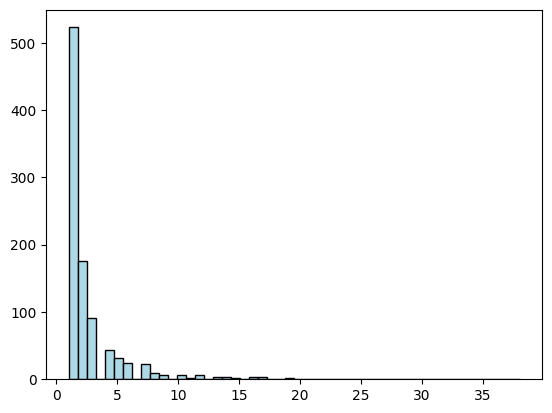

In [11]:
# Find shorter fixation lengths
print(np.mean(fixation_lengths))
print(np.median(fixation_lengths))
print(np.std([fixation_lengths]))
print(fixation_lengths)
plt.hist(fixation_lengths, color='lightblue', ec='black', bins=50)

# START HERE!

In [57]:
#gaze_projection_path = "/Users/Ben/Documents/projectaria_eyetracking/projectaria_eyetracking/Eye Gaze Values/2024-11-05-13-49-13-Day6_cityloop_reverse/eye-gaze_projection.csv"
#gaze_projection_path = '/Users/Ben/Documents/projectaria_eyetracking/projectaria_eyetracking/Eye Gaze Values/2024-11-14-10-43-34-Day9_southloop_reverse/eye-gaze_projection.csv'
gaze_projection_path = '/Users/Ben/Documents/projectaria_eyetracking/projectaria_eyetracking/Eye Gaze Values/2024-11-12-09-59-22-Day8_northloop_normal/eye-gaze_projection.csv'
#gaze_projection_path = '/Users/Ben/Documents/projectaria_eyetracking/projectaria_eyetracking/Eye Gaze Values/2024-11-08-11-14-25-Day7_cityoop_normal/eye-gaze_projection.csv'
#gaze_cpf = mps.read_eyegaze(gaze_path)
proj_file = pd.read_csv(gaze_projection_path)

cutoff = 20000
proj_points_x = proj_file["projection_point_x"]
proj_points_y = proj_file["projection_point_y"]
#proj_points = np.array(proj_points)
#print(proj_points_x)
# coords = list([obj.pitch, obj.yaw] for obj in gaze_cpf)
# coords = np.array(coords)

/var/folders/ng/7x4_9x713tg35bv9h7qq2w7m0000gn/T/ipykernel_1035/1295079207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  diffX.append(float(Xs[i+1]) - float(Xs[i]) )
/var/folders/ng/7x4_9x713tg35bv9h7qq2w7m0000gn/T/ipykernel_1035/1295079207.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  diffY.append(float(Ys[i+1]) - float(Ys[i]) )


('minimum_velocity=', 1.5224924826497954e-05)
('maximum_velocity=', 5.722074612538186)


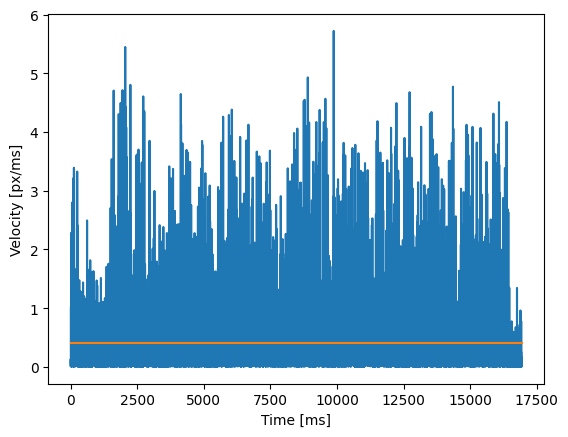

([1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,

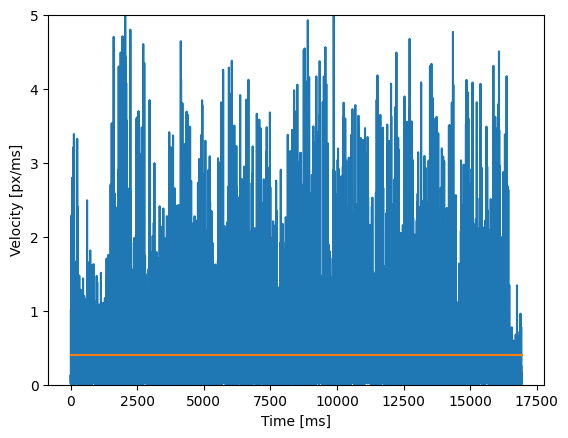

In [58]:
proj_points = []
for i in range(0, len(proj_points_x)):
    test = np.array([proj_points_x[i], proj_points_y[i]])
    proj_points.append(test)
proj_points = np.array(proj_points)

y3=ivt(proj_points, v_threshold=0.4, verbose=True)
print(y3)

[1, 2, 3, 4, 5, 6, 0, 0, 1, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 0, 0, 1, 0, 1, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 3, 4, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 3, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 3, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 0, 0, 0, 1, 0, 1, 2, 3, 4, 5, 0, 0, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 1, 2, 3, 4, 5, 0, 1, 2, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0, 0, 1, 2, 3, 4, 5, 6, 7, 0, 0, 0, 0, 0, 1, 2, 3, 0, 0, 1, 2, 3, 4, 5, 6, 0, 0, 1, 2, 0, 1, 2, 3, 4, 5, 6, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 0, 0, 0, 1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 0, 1, 2

Failed to parse eye gaze vergence file: Extra column "yaw_rads_cpf" in header of file "/Users/Ben/Documents/projectaria_eyetracking/projectaria_eyetracking/Eye Gaze Values/2024-11-12-09-59-22-Day8_northloop_normal/general_eye_gaze.csv".


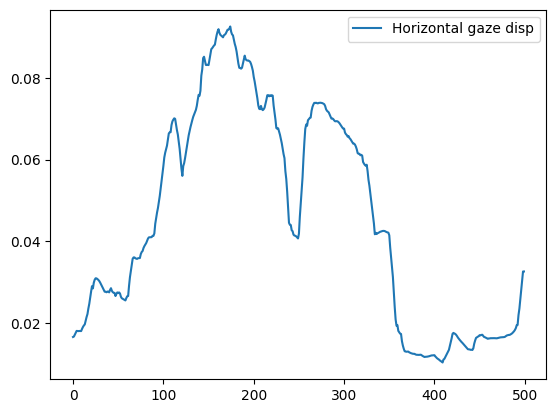

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [59]:
# Measure fixation lengths

# This is how many 1's in a row
curr_len = 0
lens = []
end_fixation_indices = []
fixation_lengths = []
for i in range(0, len(y3[0])):
    if (y3[0][i] == 2):
        if (curr_len > 0): 
            fixation_lengths.append(curr_len)
            end_fixation_indices.append(i - 1)
        curr_len = 0
        lens.append(0)
    else:
        curr_len += 1
        lens.append(curr_len)

print(lens)
print(max(lens))
print(end_fixation_indices)
print(fixation_lengths)

num_to_plot = 8000

# PLOT FIXATION POINTS AGAINST THE ACTUAL EYE POINTS
fixation_point_x = []
fixation_point_y = []
for i in end_fixation_indices:
    if (i > num_to_plot):
        break
    fixation_point_x.append(proj_points_x[i])
    fixation_point_y.append(proj_points_y[i])


# slope = pd.Series(np.gradient(pitches), times, name='slope')
# dists = pd.Series(eye_move_dists, times, name='dists')
# vals = pd.Series(pitches, times, name='pitches')

# ANALYZE HORIZONTAL GAZE DISPERTION
#   Horizontal is the yaw component
#   Want to measure variation with a 10s sliding window (30 frames)

#gaze_path = '/Users/Ben/Documents/projectaria_eyetracking/projectaria_eyetracking/Eye Gaze Values/2024-11-05-13-49-13-Day6_cityloop_reverse/general_eye_gaze.csv'
#gaze_path = '/Users/Ben/Documents/projectaria_eyetracking/projectaria_eyetracking/Eye Gaze Values/2024-11-14-10-43-34-Day9_southloop_reverse/general_eye_gaze.csv'
gaze_path = '/Users/Ben/Documents/projectaria_eyetracking/projectaria_eyetracking/Eye Gaze Values/2024-11-12-09-59-22-Day8_northloop_normal/general_eye_gaze.csv'
#gaze_path = '/Users/Ben/Documents/projectaria_eyetracking/projectaria_eyetracking/Eye Gaze Values/2024-11-08-11-14-25-Day7_cityoop_normal/general_eye_gaze.csv'
gaze_cpf = mps.read_eyegaze(gaze_path)
pitches, yaws, times = zip(*[(obj.pitch, obj.yaw, obj.tracking_timestamp) for obj in gaze_cpf])
coords = list([obj.pitch, obj.yaw] for obj in gaze_cpf)
coords = np.array(coords[0:cutoff])

# HORIZONTAL GAZE DISPERTION SLIDING WINDOW
horizontal_vars = {}
dispertion_window_size = 100
for i in range(100, min(len(yaws), cutoff)):
    window = yaws[i-100:i]
    horizontal_vars[i] = np.var(window)
    # horizontal_vars.append(np.var(window))
    # timestamps.append(i)

import heapq
from operator import itemgetter
res = dict(sorted(horizontal_vars.items(), key=itemgetter(1), reverse=True)[:10])
print(res)

fig = plt.figure()
plt.plot(list(horizontal_vars.values())[6000:6500], label='Horizontal gaze disp')
plt.legend()
plt.show()

fig = plt.figure()

locs = pd.Series(proj_points_x.values[0:num_to_plot], proj_points_y.values[0:num_to_plot], name='loc')
locs2 = pd.Series(fixation_point_x, fixation_point_y, name='loc2')

#slope = pd.Series([1,2,3], [1,2,3])
fig = plt.figure()
plt.isinteractive = False
###plt.plot(locs.index, locs.values, '-p', label='eye points')
###plt.plot(locs2.index, locs2.values, '-r', label='fixation points')
# plt.plot(dists.index, dists.values, "-b", label='dist')
# plt.plot(slope.index, slope.values, "-r", label='derivative pitch')
# plt.plot(vals.index, vals.values, "-g", label='pitches')
### plt.legend()
### fig.show()


3.903686482896048
3.0
4.424579945989483
[6, 1, 4, 12, 9, 1, 6, 1, 1, 9, 2, 1, 1, 2, 2, 1, 2, 2, 4, 1, 2, 1, 3, 2, 2, 2, 3, 11, 1, 9, 14, 8, 1, 5, 2, 2, 5, 2, 10, 7, 3, 6, 2, 6, 23, 1, 10, 5, 2, 7, 2, 2, 12, 17, 5, 2, 1, 3, 1, 2, 1, 6, 1, 2, 27, 3, 7, 8, 3, 4, 17, 3, 10, 1, 1, 4, 11, 5, 3, 5, 6, 1, 3, 4, 6, 20, 6, 9, 4, 1, 2, 3, 1, 1, 9, 6, 7, 6, 8, 4, 3, 5, 6, 3, 10, 1, 2, 3, 1, 13, 2, 9, 1, 2, 4, 2, 5, 4, 11, 5, 6, 2, 3, 1, 2, 5, 2, 2, 5, 1, 1, 2, 4, 1, 2, 6, 3, 8, 8, 1, 2, 9, 6, 1, 7, 11, 5, 7, 9, 4, 10, 13, 4, 2, 5, 13, 22, 3, 9, 3, 35, 6, 11, 11, 1, 10, 4, 10, 1, 12, 1, 20, 4, 6, 3, 10, 2, 2, 33, 7, 4, 3, 6, 5, 12, 9, 1, 10, 2, 1, 3, 1, 14, 29, 2, 2, 9, 3, 8, 30, 13, 1, 8, 3, 1, 2, 4, 18, 1, 1, 1, 2, 7, 2, 4, 3, 3, 3, 4, 6, 3, 5, 1, 1, 1, 3, 4, 11, 2, 2, 2, 1, 2, 6, 2, 4, 1, 8, 6, 8, 4, 11, 4, 5, 2, 3, 1, 5, 1, 2, 1, 3, 1, 4, 3, 3, 11, 2, 4, 1, 2, 1, 5, 2, 1, 1, 4, 1, 7, 3, 1, 6, 1, 13, 4, 11, 8, 8, 1, 4, 17, 5, 6, 2, 27, 2, 1, 1, 5, 3, 3, 12, 16, 2, 2, 2, 8, 6, 6, 6, 4, 4, 2, 1, 3

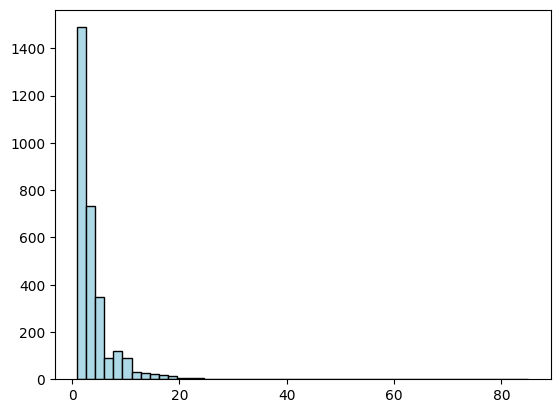

In [60]:
print(np.mean(fixation_lengths))
print(np.median(fixation_lengths))
print(np.std([fixation_lengths]))
print(fixation_lengths)
plt.hist(fixation_lengths, color='lightblue', ec='black', bins=50)
plt.show()


[6, 6, 6, 6, 6, 6, 0, 0, 1, 0, 4, 4, 4, 4, 0, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 0, 0, 0, 0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 0, 0, 1, 0, 1, 0, 0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 4, 4, 4, 4, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 3, 3, 3, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 3, 3, 3, 0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 0, 1, 0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 0, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 0, 8, 8, 8, 8, 8, 8, 8, 8, 0, 0, 0, 0, 1, 0, 5, 5, 5, 5, 5, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 5, 5, 5, 5, 5, 0, 2, 2, 0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 0, 0, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 6, 6, 6, 6, 6, 6, 0, 0, 2, 2, 0, 6, 6, 6, 6, 6, 6, 0, 0, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 0, 0, 0, 0, 1, 0, 10, 10, 10, 10, 10, 10,

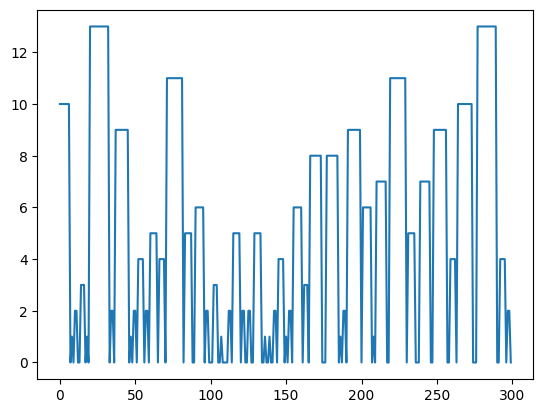

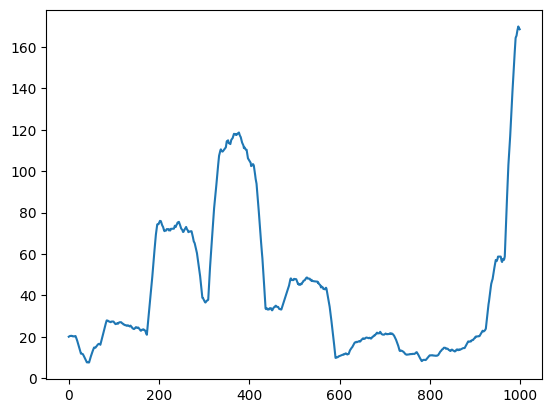

16830


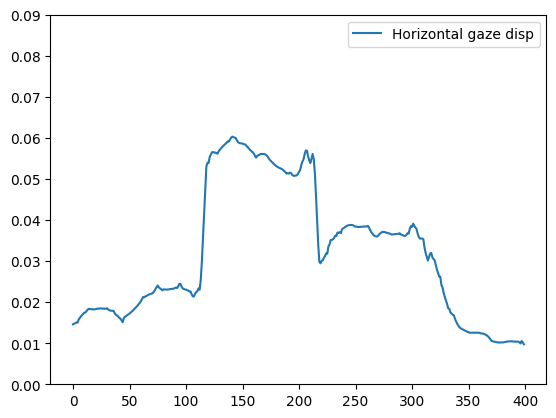

In [69]:
# FIXATION LENGTH SLIDING WINDOW SECTION OF CODE

#plt.plot(list(fixation_lengths_dict.values()), label='Fixation duration')

# Create an array that has fixation lengths for the entirity of the fixation
# Interate backwards and create array
lens_big = lens.copy()
# Converts [0, 1, 2, 3] into [0, 3, 3, 3]

temp = [0, 1, 2, 3]
curr_max = lens_big[-1]
for i, e in reversed(list(enumerate(lens_big))):
    if (curr_max == 0):
        curr_max = e
    if (e != 0):
        lens_big[i] = curr_max
        #print(curr_max)
        #    print(i, temp[i], curr_max)
    else:
        curr_max = 0

print(lens_big)

plt.plot(lens_big[700:1000], label='Fixation duration')
plt.show()  

# FIXATION LENGTH SLIDING WINDOW
fixation_lengths_dict = {}
for i in range(dispertion_window_size, min(len(lens_big), cutoff)):
    window = lens_big[i-dispertion_window_size:i]
    fixation_lengths_dict[i] = np.var(window)

plt.plot(list(fixation_lengths_dict.values())[0:1000], label='Fixation duration')
plt.show()

#laa = [x * 100 for x in list(horizontal_vars.values()).copy()]
#plt.plot(laa[6000:7800], label='Horizontal gaze disp')
print(len(horizontal_vars.values()))
plt.plot(list(horizontal_vars.values())[3400:3800], label='Horizontal gaze disp')
plt.ylim(0, 0.09)
plt.legend()



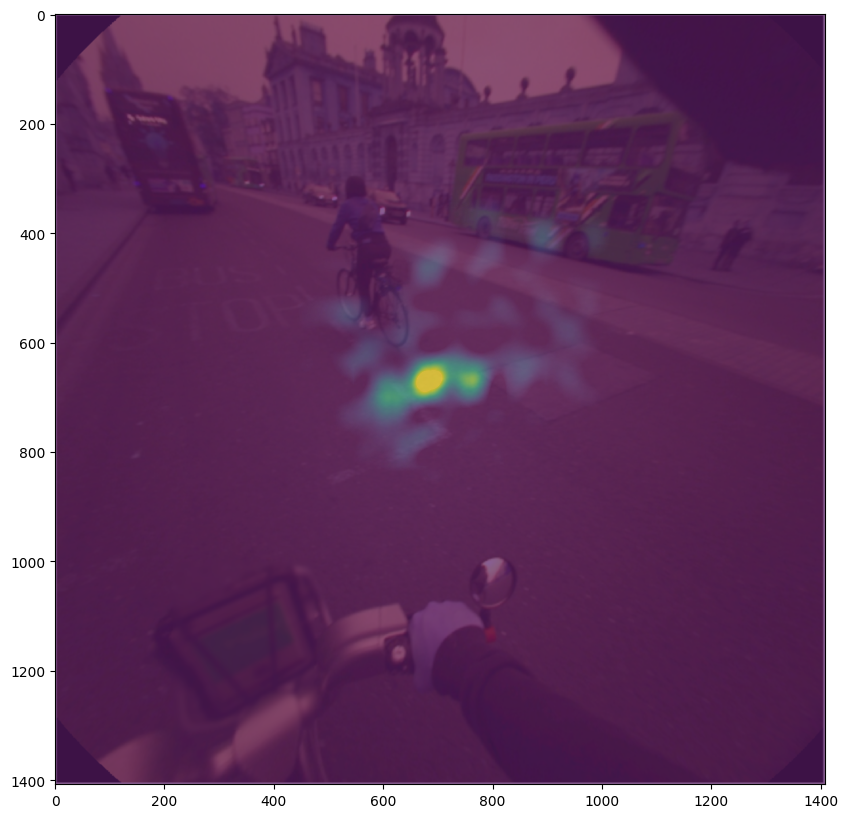

In [36]:
#import seaborn as sns
# Generate heatmap for a window before a given timestamp
import cv2

def generate_heatmap_for_timestamp(timestamp, window_len = 10):

    # Convert changes to location
    eye_move_dists = [0]
    gaze_loc = [[0,0]]
    gaze_loc_x = [0]
    gaze_loc_y = [0]
    for i in range(1, 6500):#len(pitches)):
        d_x = (pitches[i] - pitches[i-1])
        d_y = (yaws[i] - yaws[i-1])
        eye_move_dists.append(math.sqrt((d_x*d_x) + (d_y*d_y))) # Distance moved of the eyes at each time step
        #gaze_loc.append([gaze_loc[i-1, 0] + d_x, gaze_loc[i-1, 1] + d_y]) # Position of eyes over time. Starts at (0,0)
        gaze_loc_x.append(gaze_loc_x[i-1] + d_x)
        gaze_loc_y.append(gaze_loc_y[i-1] + d_y)

    #print(eye_gazes)
    
    # plt.hist2d(pitches[1000:1150], yaws[1000:1150], bins=[np.arange(-0.7,0.5,0.01),np.arange(-0.7,0.5,0.01)])
    # plt.show()

    # TODO: Convert coords so that 0,0 is in top left of the image
    
    # plt.hist2d(proj_points_x[0:5600], proj_points_y[0:5600], bins=[np.arange(400,900,5),np.arange(400,900,5)])
    
    # plt.show()
    #plt.hist2d(gaze_loc_x[1000:1150], gaze_loc_y[1000:1150], bins=[np.arange(-0.5,0.5,0.03),np.arange(-0.5,0.5,0.03)])
    #plt.show()

    #plt.hist2d(gaze_loc_x[1000:1150], gaze_loc_y[1000:1150], bins=[np.arange(-0.5,0.5,0.03),np.arange(-0.5,0.5,0.03)])
    # plt.plot(proj_file["tracking_timestamp_us"][:1000], gaze_loc_x[:1000])
    # plt.show()
    # from skimage import exposure
    num_frames = 30*window_len  # We recorded at 30 fps so need to convert to seconds
    index = 880#times.index(timestamp)
    eye_gazes = coords[index-num_frames:index]
    #sns.heatmap(eye_gazes)
    img = cv2.imread("/Users/Ben/Desktop/centralday7_88s_upscaled.png")
    # print(img.shape)
    #blank = np.zeros((1408, 1408))
    # H, xedges, yedges = np.histogram2d(proj_points_x[0:6500], proj_points_y[0:6500],
    #                                bins=100, range=[[0, 1408], [0,1408]], weights=None)
    H, xedges, yedges = np.histogram2d(proj_points_x[index-num_frames:index], proj_points_y[index-num_frames:index],
                                   bins=40, range=[[0, 1408], [0,1408]], weights=None)
    
    H = H.T
    #print(H.shape)
    fig = plt.figure(figsize=(10,10))
    #fig.add_subplot(131, title='imshow: square bins')
    #plt.subplot(1,2,1)
    im = plt.imshow(H, interpolation='sinc', origin='lower',
        extent=[0, 1408, 0, 1408], alpha=0.9)
    #im.set_cmap('gist_heat_r')
    #im.set_cmap('twilight')

    #[xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    #plt.show()

    #fig.add_subplot(131, title='imshow: square bins2')
    plt.imshow(img, alpha=0.3)

    #plt.imshow(teste, cmap='jet', alpha=0.5)
    # plt.imshow()
    plt.show()
    # #map_img = exposure.rescale_intensity(gaze_loc, out_range=(0, 255))
    # # map_img = np.uint8(gaze_loc)
    # #print(map_img)
    # print(gaze_loc)
    # heatmap_img = cv2.applyColorMap(gaze_loc, cv2.COLORMAP_JET)
    # super_imposed_img = cv2.addWeighted(heatmap_img, 0.5, img, 0.5, 0)
    # cv2.imshow('frame', super_imposed_img)

generate_heatmap_for_timestamp(1000)